<a href="https://colab.research.google.com/github/pratimavermaa/YoloV3/blob/master/90Images_2steps_YoloV3Sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/pratimavermaa/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 400, done.
remote: Counting objects: 100% (233/233), done.
remote: Compressing objects: 100% (213/213), done.
remote: Total 400 (delta 26), reused 218 (delta 17), pack-reused 167
Receiving objects: 100% (400/400), 26.85 MiB | 20.77 MiB/s, done.
Resolving deltas: 100% (37/37), done.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#  !unzip '/content/YoloV3/data/customdata.zip' -d '/content/YoloV3/data/customdata'

In [ ]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.9.0+cu102 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


In [ ]:
ls

gdrive/  sample_data/  YoloV3/


In [ ]:
# cd YoloV3/

In [ ]:
%cd /content/YoloV3

/content/YoloV3


In [ ]:
!ls

 annotation_tool   output	  results.txt	     train.py
 cfg		   __pycache__	  test_batch0.png   'ubdivisions=1'
 data		   README.md	  test.py	     utils
 detect.py	   results.json   ting		     vim.exe.stackdump
 models.py	   results.png	  train_batch0.png


In [ ]:
!mkdir weights
!cp /content/gdrive/My\ Drive/My_files/yolov3-spp-ultralytics.pt ./weights/
# /content/gdrive/MyDrive/My_files/yolov3-spp-ultralytics.pt

Image Path

**Extract Labels and and Image Shapes**


In [ ]:
!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 100 --nosave


Namespace(accumulate=4, adam=False, batch_size=3, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=100, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2021-08-02 20:43:17.105554: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 5034.57it/s]
Caching images (0.0GB): 100% 20/20 [00:00<00:00, 121.98it/s]
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:0

**custom.txt give image path/ image names in the same sequence as its in images folder else will get cv2 error  also train in small batches or save weights**

In [ ]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 40 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=40, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2021-08-02 20:52:21.005607: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
Caching labels (90 found, 0 missing, 0 empty, 0 duplicate, for 90 images): 100% 90/90 [00:00<00:00, 6602.43it/s]
Caching images (0.0GB): 100% 90/90 [00:01<00:00, 63.49it/s]
Reading image shapes: 100% 90/90 [00:00<00:00, 2635.33it/s]
Caching labels (90 found, 0 missing

In [ ]:

!python detect.py --conf-thres 0.1 --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
image 1/90 data/customdata/images/PV001.jpg: 512x320 5 hardhats, 1 vests, 1 masks, 5 bootss, Done. (0.017s)
ima

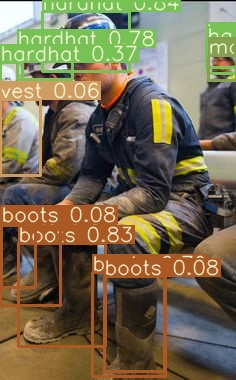

In [ ]:
Image(filename='out_out/PV001.jpg', width=600)

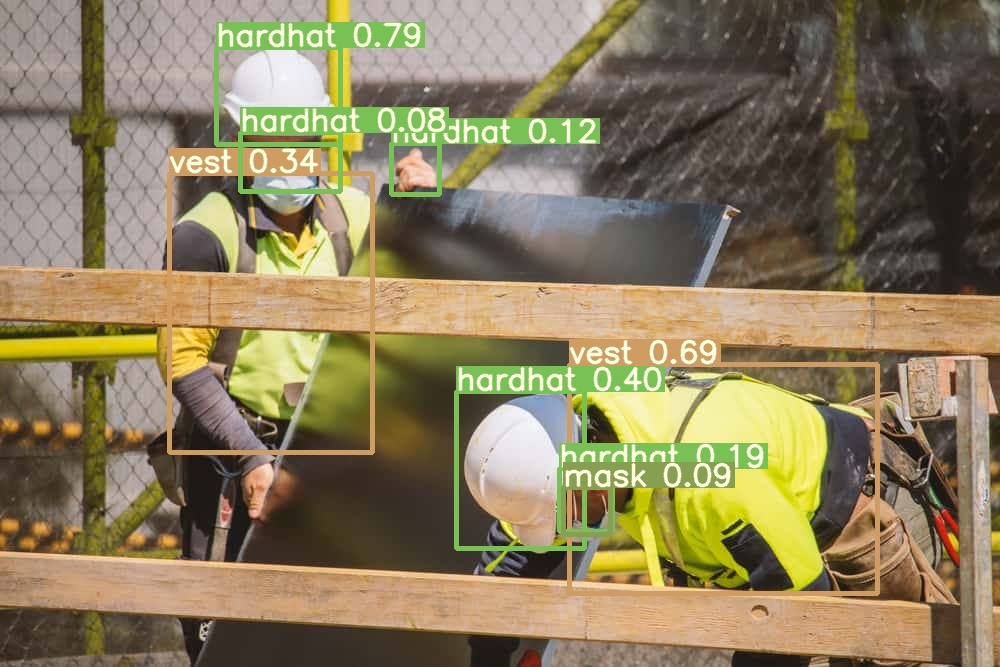

In [ ]:
Image(filename='out_out/PV020.jpg', width=600)

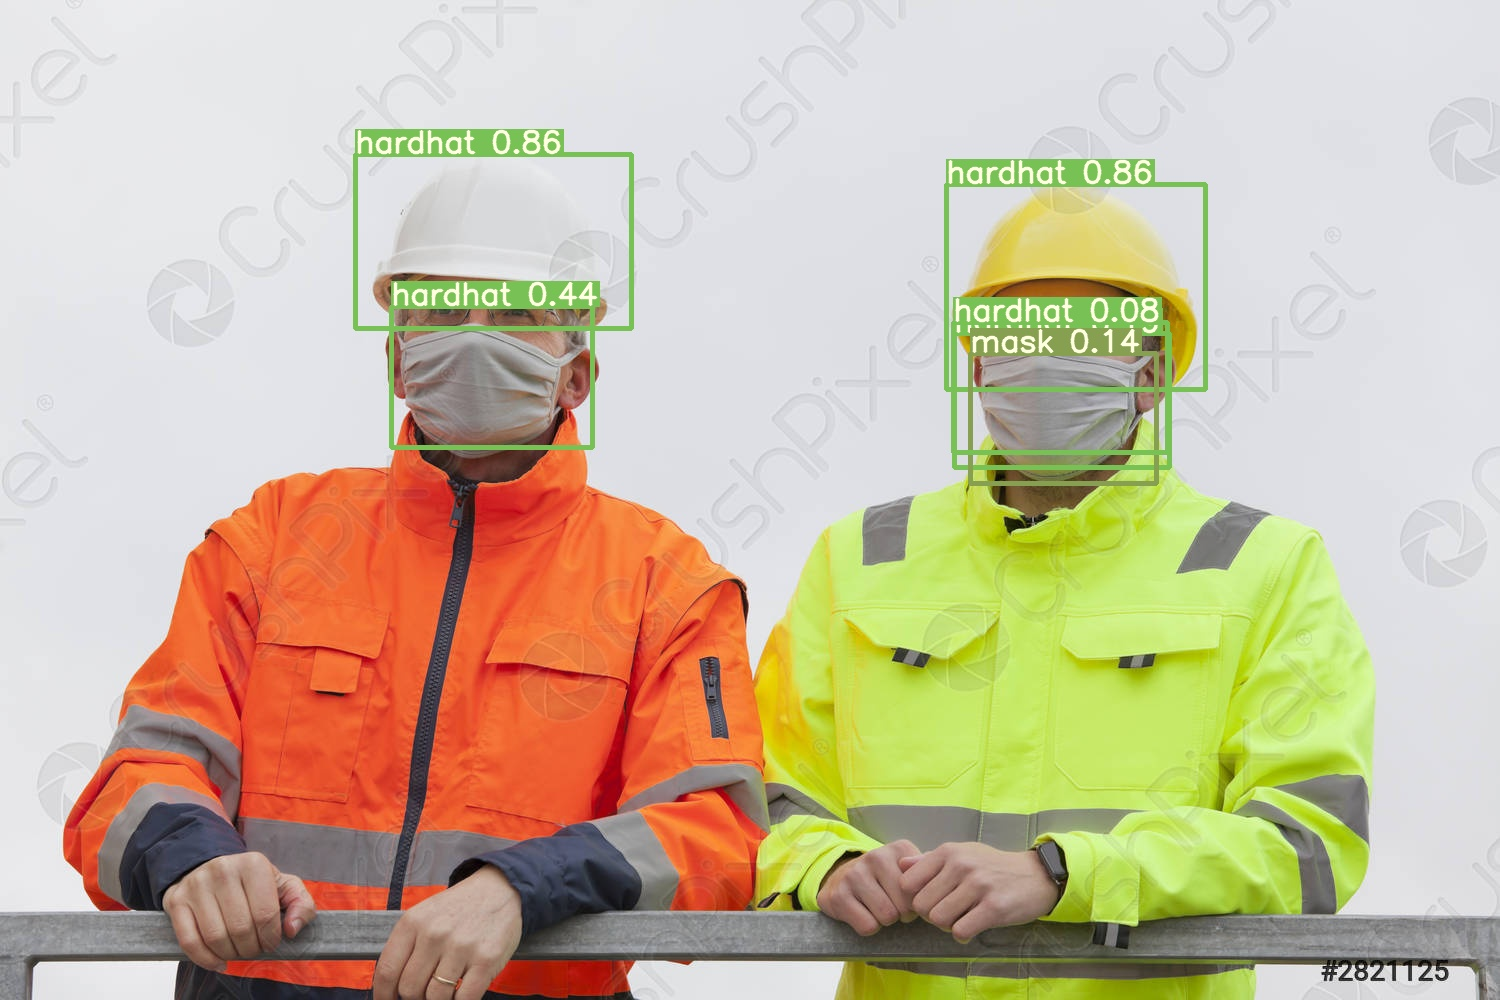

In [ ]:
Image(filename='out_out/PV014.jpg', width=600)

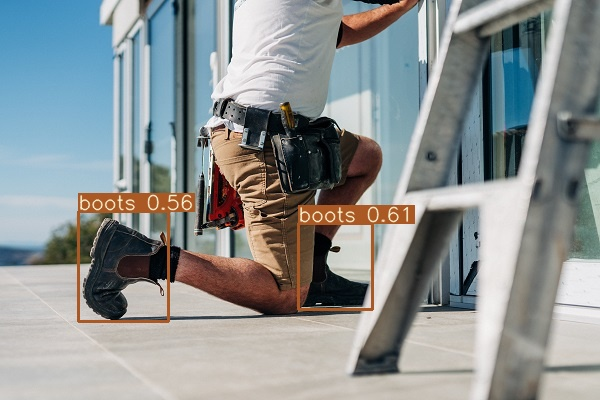

In [ ]:
Image(filename='out_out/PV099.jpg', width=600)

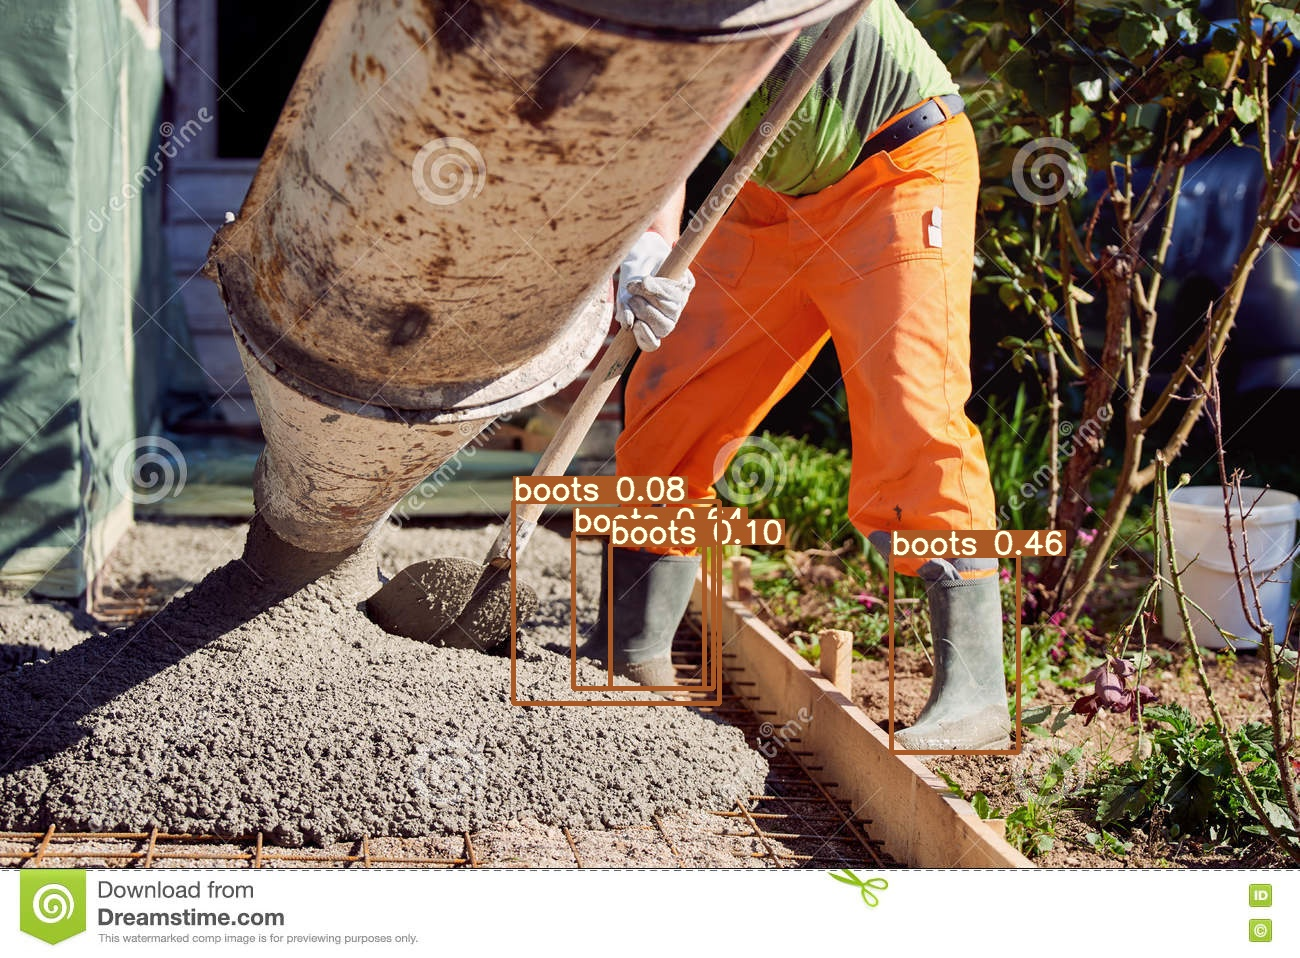

In [ ]:
Image(filename='out_out/PV067.jpg', width=600)

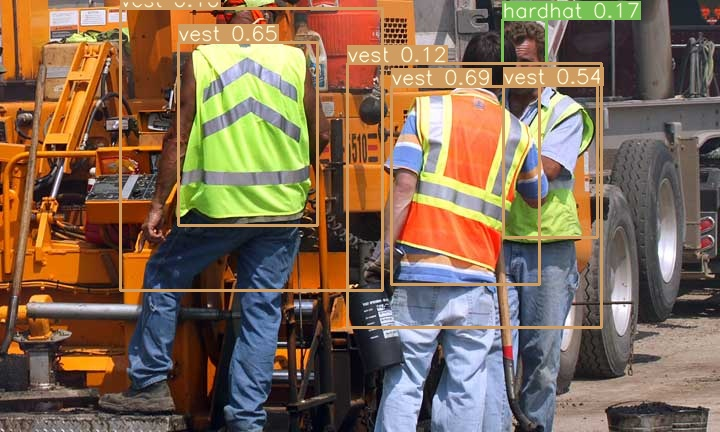

In [ ]:
Image(filename='out_out/PV076.jpg', width=600)